In [1]:
#Importing required Python packages 
import matplotlib.pylab as plt 
import numpy as np 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression 

from pprint import pprint 
import seaborn as sns 
from matplotlib import collections 
%matplotlib inline 

## Define Function

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x=x[:, np.newaxis]
y = y[:, np.newaxis]

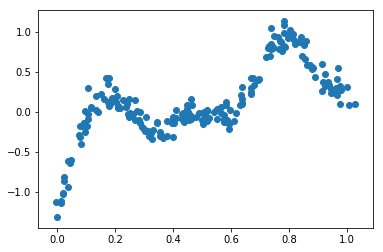

In [3]:
plt.scatter(x, y)

In [4]:
inp  = np.c_[x,y]

### PCA projected value plot

[[-0.47399362 -0.88052828]]


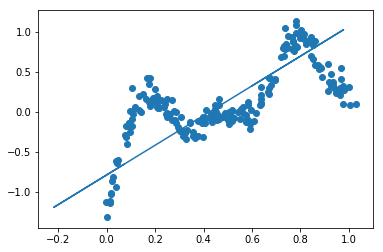

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(inp)
xy_n=pca.inverse_transform(principalComponents)

plt.scatter(x, y)
x_n = xy_n[:, 0]
y_n = xy_n[:, 1]
plt.plot(x_n, y_n)
# plt.plot(xy_n[:, 0], xy_n[:,1])
print(pca.components_)

### Finding PCA line from the learned variables

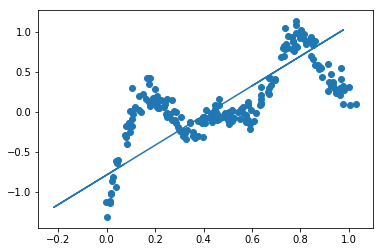

In [39]:
plt.scatter(x, y)
data_reduced = np.dot(inp - pca.mean_, pca.components_.T)
data_original = np.dot(data_reduced, pca.components_) + pca.mean_
plt.plot(data_original[:,0], data_original[:,1])

### Autoencoder using pyTorch

In [6]:
import torch
import torch.nn.functional as F

In [7]:
X = torch.from_numpy(inp).type(torch.float32)
Xnorm = X - X.mean(dim=0)

W = torch.empty(2,1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
b_ = torch.zeros(2, requires_grad=True)

torch.nn.init.uniform_(W)

alpha = 0.01
optimizer = torch.optim.SGD(params=[W, b, b_], lr=alpha)

In [8]:
for i in range(10000):
#     h = Xnorm.mm(W)
    h = X.mm(W) + b
#     h = Xx.mm(W)
#     W_ = torch.from_numpy(np.linalg.pinv(W.data.numpy()))
    W_ = W.t()
    X_ = h.mm(W_) + b_
    
    
#     h = Xnorm.mm(W.t())
# xxx = xx + X.mean(dim=0)
#     X_ = h.mm(W)
    
    optimizer.zero_grad()
    loss = F.mse_loss(X_, X)
    loss.backward()
    optimizer.step()
    
    if i%1000 == 0:
        print('loss = ',loss)

loss =  tensor(0.1414, grad_fn=<MseLossBackward>)
loss =  tensor(0.0273, grad_fn=<MseLossBackward>)
loss =  tensor(0.0202, grad_fn=<MseLossBackward>)
loss =  tensor(0.0185, grad_fn=<MseLossBackward>)
loss =  tensor(0.0178, grad_fn=<MseLossBackward>)
loss =  tensor(0.0175, grad_fn=<MseLossBackward>)
loss =  tensor(0.0173, grad_fn=<MseLossBackward>)
loss =  tensor(0.0172, grad_fn=<MseLossBackward>)
loss =  tensor(0.0171, grad_fn=<MseLossBackward>)
loss =  tensor(0.0170, grad_fn=<MseLossBackward>)


In [9]:
W

tensor([[0.4503],
        [0.8936]], requires_grad=True)

In [24]:
b

tensor([-1.1398], requires_grad=True)

In [25]:
b_

tensor([0.8500], requires_grad=True)

In [46]:
X.mean(dim=0), h.mean().data

(tensor([0.4969, 0.1348]), tensor(-0.7956))

### Plot of the hidden value given X

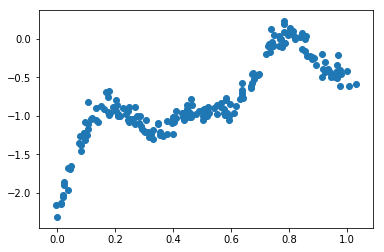

In [26]:
plt.scatter(x, h.data.numpy())

### Plot of the hidden value given Y

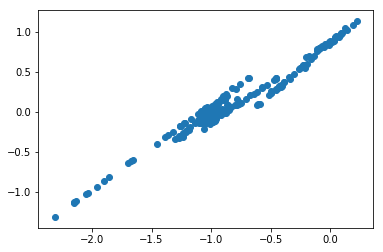

In [27]:
plt.scatter(h.data.numpy(), y)

### Plot the line extracted from AE

components tensor([[0.2028, 0.4024],
        [0.4024, 0.7985]], grad_fn=<MmBackward>)


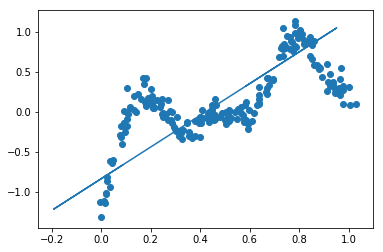

In [37]:
h = X.mm(W) + b
xx = h.mm(W.t()) + b_
# plt.axis('equal')
plt.scatter(x,y)
plt.plot(xx.data.numpy()[:,0],xx.data.numpy()[:,1] )
print('components', W.mm(W.t()))

#### PCA projected value plot

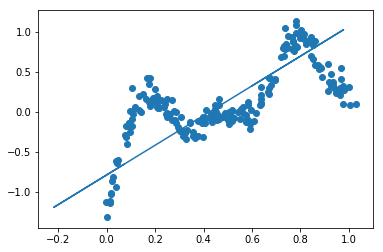

In [38]:
plt.scatter(x, y)
x_n = xy_n[:, 0]
y_n = xy_n[:, 1]
plt.plot(x_n, y_n)

### They look close enough